# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Naufal Farras Pratama
- **Email:** blueshoko@gmail.com
- **ID Dicoding:** zwicky12

## Menentukan Pertanyaan Bisnis

- Faktor-faktor apa saja yang memengaruhi perkembangan kualitas udara?  
- Bagaimana perkembangan kualitas udara tiap tahun?
- Bagaimana kualitas udara daerah pusat kota dan diluar pusat kota?
- Station mana yang memiliki kualitas udara terburuk dan terbaik
- Bagaimana persebaran data station pada dataran china?

## Import Semua Packages/Library yang Digunakan

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

## Data Wrangling

### Gathering Data

In [50]:
city_a = pd.read_csv('./data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
city_a.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


Penjelasan tiap column
- No : index
- year : tahun
- month  : bulan
- day : hari 
- pm2.5 : konsentrasi particulate matter sama dengan 2.5 or less (micrograms per cubic meter)
- pm10 : konsentrasi particulate matter sama dengan 10 or less (micrograms per cubic meter)
- SO2 : konsentrasi sulfur dioxide (microgams per cubic meter)
- NO2 : konsentrasi nitrogen dioxide (microgams per cubic meter)
- CO : konsentrasi ozone
- NO2 : konsentrasi nitrogen dioxide
- TEMP : temperatur (in celcius??)
- PRES : tekanan atmosfer (in hPa??)
- DEWP : Dew point temperatur
- wd : arah angin
- RAIN : mm/h
- WSPM : kecepatan angin (in m/s)
- station : tempat diambilnya data 

In [51]:
city_b = pd.read_csv('./data/PRSA_Data_Changping_20130301-20170228.csv')
city_b.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [52]:
city_b.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        481
PM10         562
SO2          294
NO2          459
CO           115
O3           886
TEMP         998
PRES         592
DEWP         602
RAIN         116
wd            16
WSPM          95
station        1
dtype: int64

kolom station memiliki 1 nilai unik yang merepresentasikan kota sebagai tempat data diambil maka tiap data csv bisa kita gabung saja menggunakan concat secara vertikal

In [53]:
city_c = pd.read_csv('./data/PRSA_Data_Dingling_20130301-20170228.csv')
city_d = pd.read_csv('./data/PRSA_Data_Dongsi_20130301-20170228.csv')
city_e = pd.read_csv('./data/PRSA_Data_Guanyuan_20130301-20170228.csv')
city_f = pd.read_csv('./data/PRSA_Data_Gucheng_20130301-20170228.csv')
city_g = pd.read_csv('./data/PRSA_Data_Huairou_20130301-20170228.csv')
city_h = pd.read_csv('./data/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
city_i = pd.read_csv('./data/PRSA_Data_Shunyi_20130301-20170228.csv')
city_j = pd.read_csv('./data/PRSA_Data_Tiantan_20130301-20170228.csv')
city_k = pd.read_csv('./data/PRSA_Data_Wanliu_20130301-20170228.csv')
city_l = pd.read_csv('./data/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

In [54]:

combined_data = pd.concat([city_a, city_b, city_c, city_d, city_e, city_f, city_g, city_h, city_i, city_j, city_k, city_l], ignore_index=True)
combined_data['station'].unique()

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

In [55]:
combined_data.drop(['No'], axis=1, inplace=True)
combined_data.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


Pada bagian gathering data ini kita mengetahui bahwa terdapat beberapa data csv yang merupakan data terpisah berdasarkan kota. Pada tiap kolom station hanya terdapat 1 jenis data yang melambangkan kota tempat data tersebut diambil. Maka pada keseluruhan data tersebut dapat digabungkan menggunakan concat secara vertikal karena kolomnya memiliki kesamaan. Tujuan penggabungan ini agar data lebih mudah ketika diolah. 

### Assessing Data

In [56]:
combined_data.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


Dari diatas tidak terlihat adanya nilai anomali nampak bahwa periode data diambil dari tahun 2013 hingga 2017. untuk rentang waktu seperti hari, bulan dan jam sudah sesuai bila dilihat pada nilai min dan max nya. 

In [57]:
combined_data.isnull().sum()

year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [58]:
combined_data.duplicated().sum()

np.int64(0)

Bisa dilihat pada data diatas terdapat beberapa kolom yang memiliki null value namun tak memiliki nilai duplikat. 

In [59]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    412029 non-null  float64
 5   PM10     414319 non-null  float64
 6   SO2      411747 non-null  float64
 7   NO2      408652 non-null  float64
 8   CO       400067 non-null  float64
 9   O3       407491 non-null  float64
 10  TEMP     420370 non-null  float64
 11  PRES     420375 non-null  float64
 12  DEWP     420365 non-null  float64
 13  RAIN     420378 non-null  float64
 14  wd       418946 non-null  object 
 15  WSPM     420450 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB


tipe data sudah sesuai

In [60]:
zscore = pd.DataFrame([], columns=combined_data._get_numeric_data().columns)
for i in combined_data.columns:
    if combined_data[i].dtype != 'object':
        zscore[i] = (combined_data[i] - combined_data[i].mean())/combined_data[i].std()

In [61]:
combined_data[zscore[zscore[zscore._get_numeric_data().columns] > 3].notnull().any(axis=1)]

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
46,2013,3,2,22,81.0,113.0,84.0,110.0,1500.0,3.0,-0.6,1022.3,-13.9,0.0,NNE,1.4,Aotizhongxin
47,2013,3,2,23,93.0,120.0,87.0,107.0,1700.0,2.0,-0.8,1021.1,-13.4,0.0,N,1.3,Aotizhongxin
50,2013,3,3,2,110.0,132.0,98.0,99.0,2399.0,2.0,-2.8,1018.3,-12.3,0.0,NE,1.4,Aotizhongxin
51,2013,3,3,3,105.0,129.0,88.0,100.0,2500.0,2.0,-2.6,1017.2,-13.2,0.0,NE,1.2,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420469,2017,2,16,13,16.0,44.0,4.0,18.0,400.0,62.0,7.1,1014.9,-13.8,0.0,NE,6.1,Wanshouxigong
420471,2017,2,16,15,5.0,16.0,2.0,17.0,300.0,70.0,6.6,1015.7,-17.5,0.0,ENE,6.0,Wanshouxigong
420544,2017,2,19,16,30.0,118.0,3.0,13.0,400.0,80.0,10.3,1005.2,-21.3,0.0,N,6.1,Wanshouxigong
420546,2017,2,19,18,10.0,66.0,2.0,10.0,300.0,79.0,9.2,1008.8,-20.9,0.0,NNW,6.1,Wanshouxigong


pada code diatas, dilakukan perhitungan zscore pada tiap value pada tiap kolom numeric. Zscore sendiri menghitung seberapa jauh suatu data dari rata-rata dalam satuan deviasi standar. Didapat total 38 ribu lebih rows yang di indikasikan sebagai outlier dengan faktor k 3. 

year        Axes(0.125,0.712609;0.168478x0.167391)
month    Axes(0.327174,0.712609;0.168478x0.167391)
day      Axes(0.529348,0.712609;0.168478x0.167391)
hour     Axes(0.731522,0.712609;0.168478x0.167391)
PM2.5       Axes(0.125,0.511739;0.168478x0.167391)
PM10     Axes(0.327174,0.511739;0.168478x0.167391)
SO2      Axes(0.529348,0.511739;0.168478x0.167391)
NO2      Axes(0.731522,0.511739;0.168478x0.167391)
CO           Axes(0.125,0.31087;0.168478x0.167391)
O3        Axes(0.327174,0.31087;0.168478x0.167391)
TEMP      Axes(0.529348,0.31087;0.168478x0.167391)
PRES      Axes(0.731522,0.31087;0.168478x0.167391)
DEWP            Axes(0.125,0.11;0.168478x0.167391)
RAIN         Axes(0.327174,0.11;0.168478x0.167391)
WSPM         Axes(0.529348,0.11;0.168478x0.167391)
dtype: object

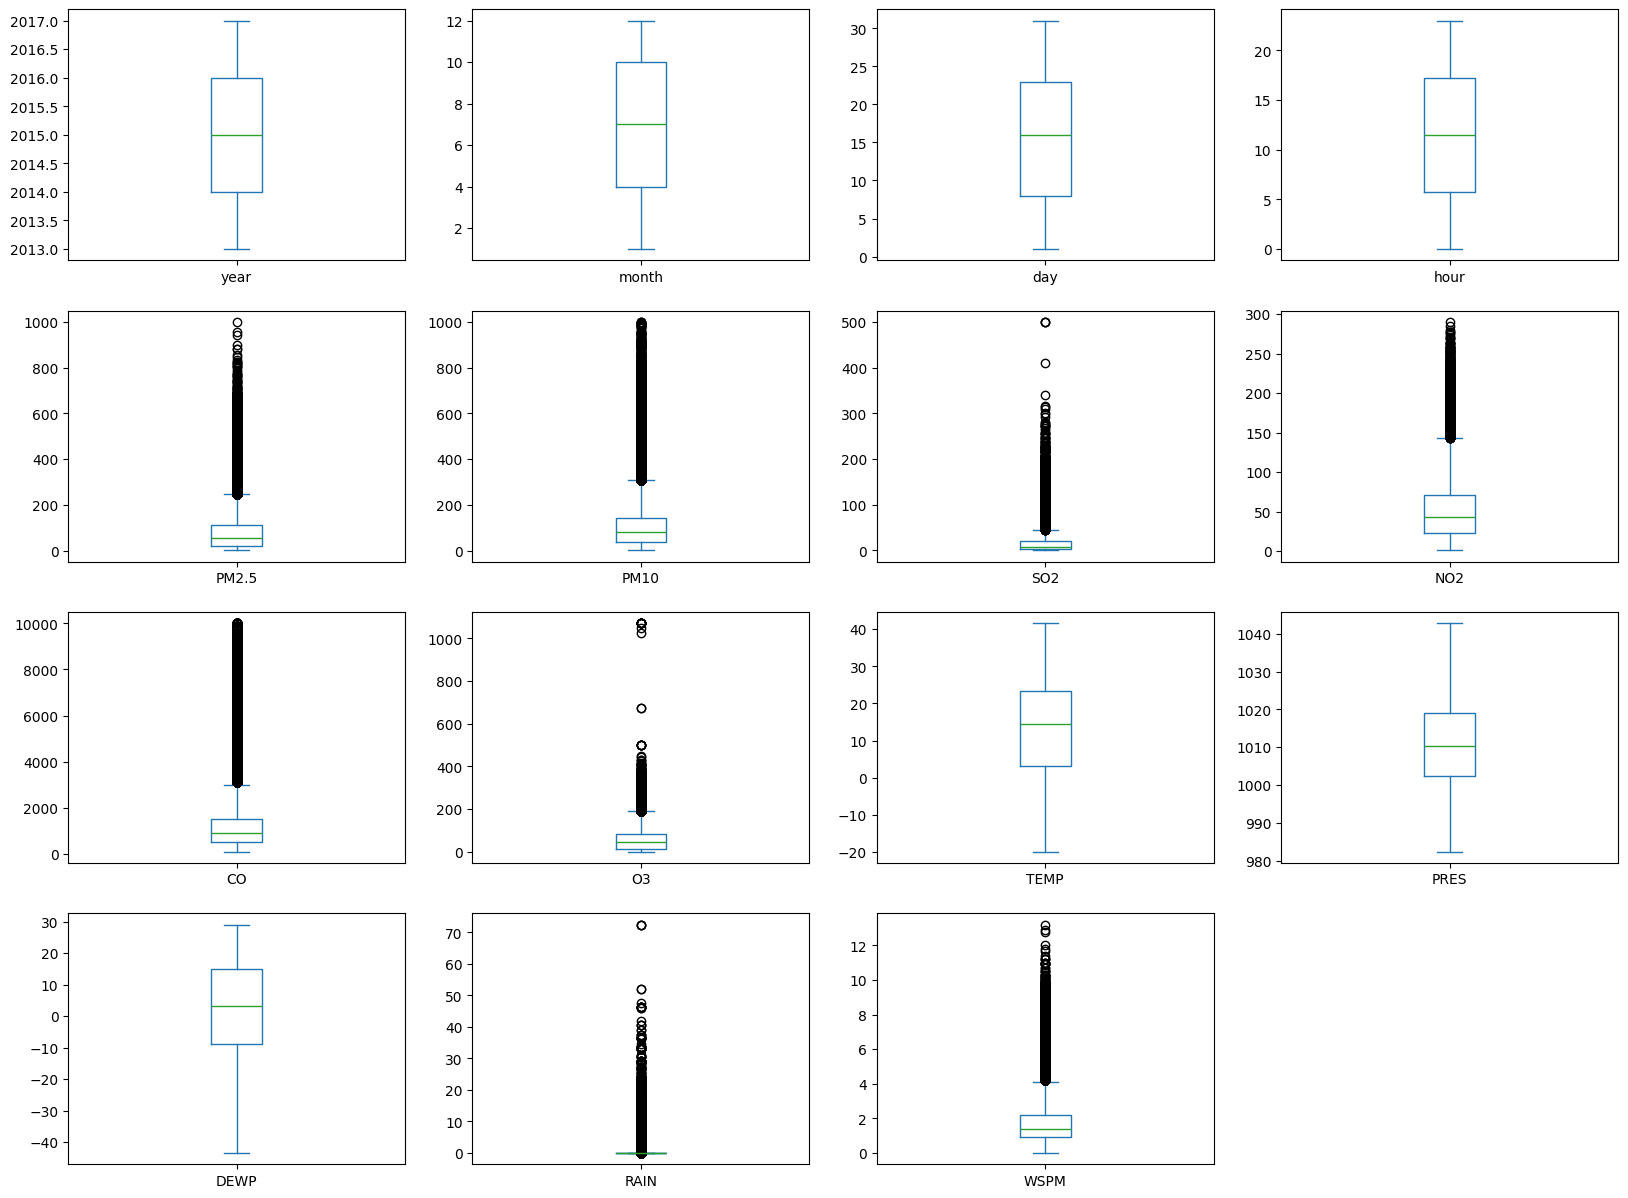

In [62]:
combined_data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,15))

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'SO2'}>, <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'CO'}>, <Axes: title={'center': 'O3'}>,
        <Axes: title={'center': 'TEMP'}>,
        <Axes: title={'center': 'PRES'}>],
       [<Axes: title={'center': 'DEWP'}>,
        <Axes: title={'center': 'RAIN'}>,
        <Axes: title={'center': 'WSPM'}>, <Axes: >]], dtype=object)

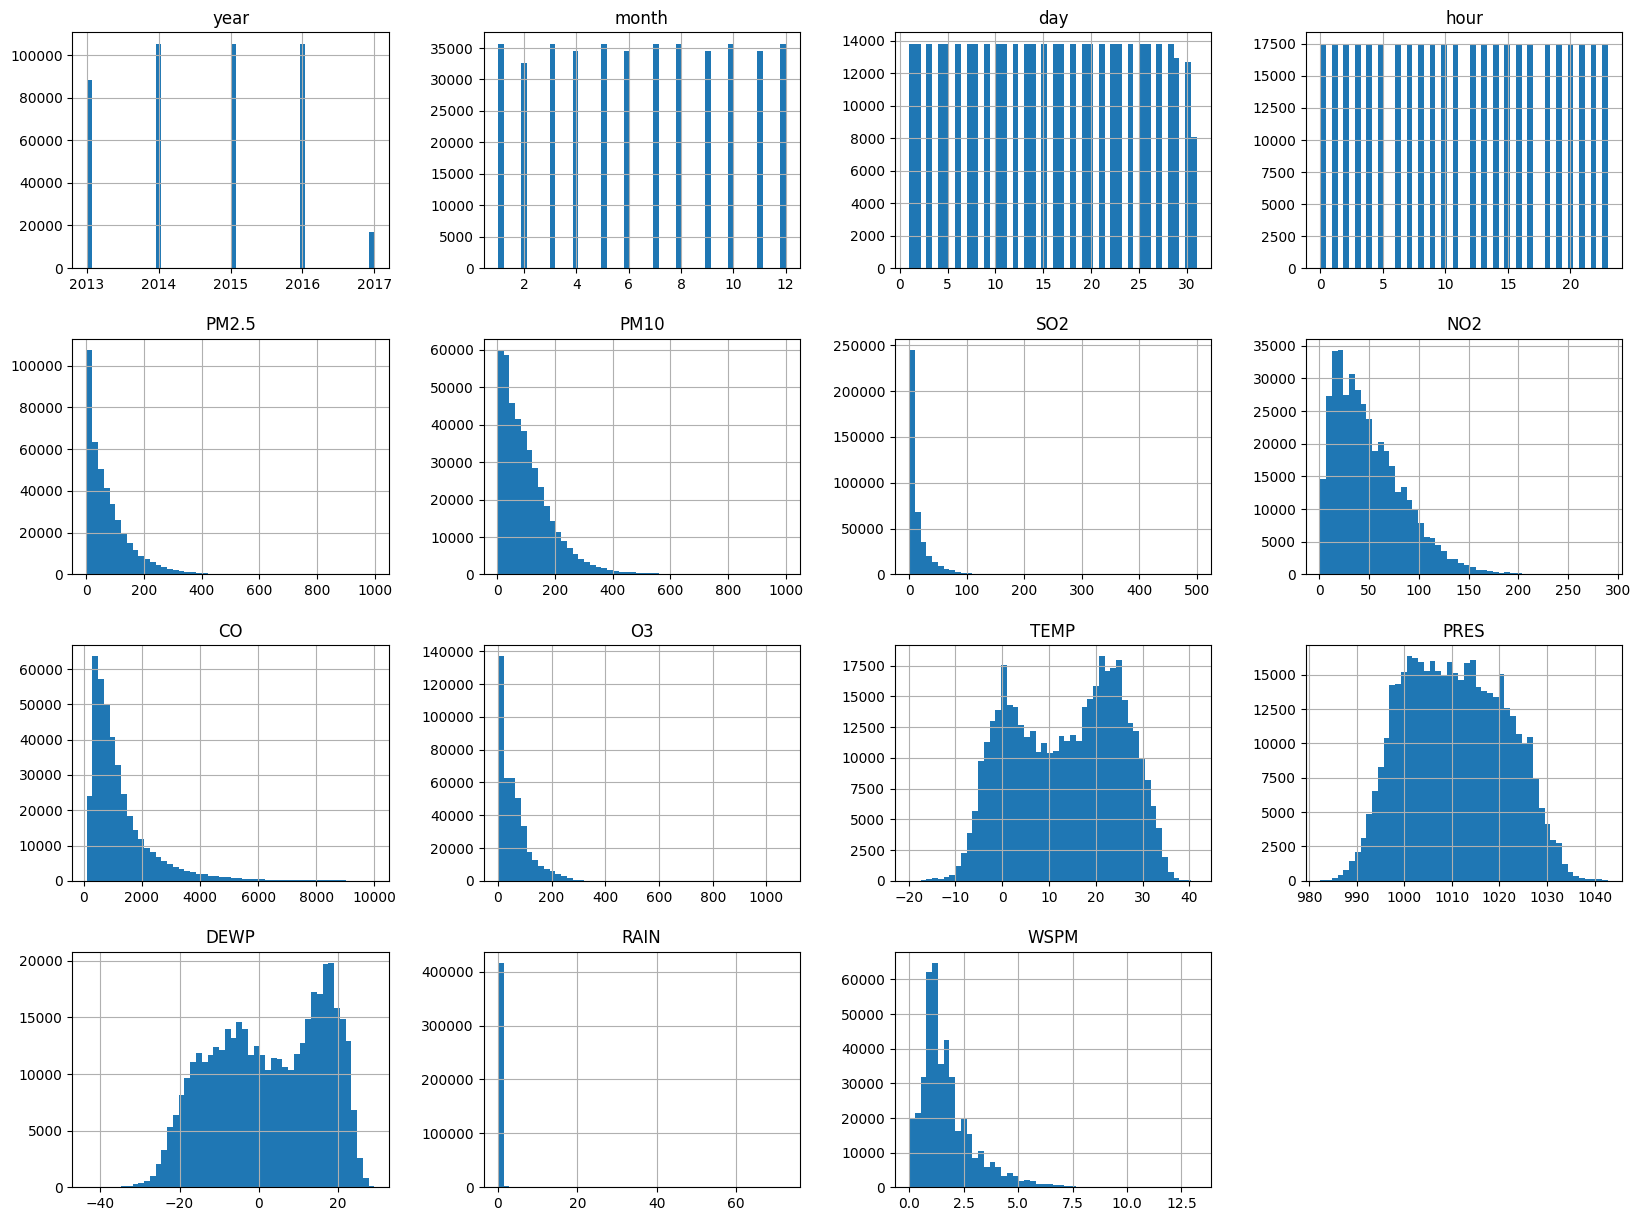

In [63]:
combined_data.hist(bins=50, figsize=(20,15))

kebanyakan distribusi grafik digambarkan sebagai right skewed, yang paling parah terdapat pada kolom RAIN. Sementara itu bila dilihat pada kolom yang terindikasi sebagai waktu memiliki distribusi yang rata namun pada kolum tahun pada data tahun 2017 terdapat selisih data yang lebih sedikit dibandingkan dengan tahun lainnya. Bila kita merujuk pada kolom time terdapat kekosongan data dengan rentang tahun kira-kira 2017-2018 yang menjadi alasan mengapa data pada tahun 2017 lebih sedikit bila dibandingkan yang lainnya. 

### Cleaning Data

In [64]:
def handleMisValue(data):
    for i in data.columns:
        if data[i].dtype != 'object':
            data[i] = data[i].fillna(data[i].mean())
        else:
            data[i] = data[i].fillna(data[i].mode()[0])
    return data


def handleOutlier(data):
    zscore = pd.DataFrame([], columns=data._get_numeric_data().columns)
    for i in data.columns:
        if data[i].dtype != 'object':
            zscore[i] = (data[i] - data[i].mean())/data[i].std()
    data.drop(data.index[zscore[zscore[zscore._get_numeric_data().columns] > 3].notnull().any(axis=1)], inplace=True)
    return data

def renameColumns(data):
    data.columns = ['year','month','day','hour', 'PM2.5(µg/m³)', 'PM10(µg/m³)', 'SO2(µg/m³)', 'NO2(µg/m³)', 'CO(µg/m³)', 'O3(µg/m³)', 'TEMP(°C)', 'PRES(hPa)', 'DEWP(°C)', 'RAIN(mm/h)', 'wd', 'WSPM(m/s)','station']
    return data



Untuk menangani data yang kosong dilakukan pengsian rata-rata pada data numerik, dan pengisian data paling sering muncul pada data kategori. Hal ini dikarenakan bila kita menghapus data yang kosong maka akan terjadi kekosongan data sehingga akan ada beberapa data yang hilang, hal ini bisa mempengaruhi saat kita melihat perkembangan tiap tahun akan ada lompatan waktu dikarenakan data tersebut telah dihapus. Maka dari itu menambal data yang kosong dengan nilai rata2 dan modus adalah pilihan yang bijak. Untuk outlier sendiri dikarenakan tidak begitu banyak maka penanganannya bisa dilakukan dengan menghapus data yang dianggap outlier. Fungsi renameColumns digunakan untuk menambahkan satuan pada columns agar lebih jelas

In [65]:
clean_data = handleMisValue(combined_data)
clean_data = handleOutlier(combined_data)
clean_data = renameColumns(combined_data)


Disini untuk teknik cleaning data saya bentuk dalam fungsi agar bersifat modular sehingga bila terdapat data berbeda kita tinggal memanggil fungsi untuk menangani data tersebut

In [66]:
clean_data.describe()

,year,month,day,hour,PM2.5(µg/m³),PM10(µg/m³),SO2(µg/m³),NO2(µg/m³),CO(µg/m³),O3(µg/m³),TEMP(°C),PRES(hPa),DEWP(°C),RAIN(mm/h),WSPM(m/s)
count,381128.000000,381128.000000,381128.000000,381128.000000,381128.000000,381128.000000,381128.000000,381128.000000,381128.000000,381128.000000,381128.000000,381128.000000,381128.000000,381128.000000,381128.000000
mean,2014.668484,6.566135,15.758155,11.369044,69.780888,92.452626,13.355591,48.025046,1083.275409,55.223683,13.798582,1010.682649,2.760509,0.021865,1.654668
std,1.179312,3.387529,8.787306,6.958441,62.272384,70.783116,15.414943,30.275885,801.969172,49.351034,11.230751,10.464442,13.836133,0.158319,1.081689
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.000000,20.000000,34.000000,2.000000,24.000000,500.000000,13.000000,3.800000,1002.200000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.000000,53.000000,78.000000,7.000000,44.000000,900.000000,47.000000,15.000000,1010.200000,3.800000,0.000000,1.400000
75%,2016.000000,9.000000,23.000000,17.000000,99.000000,132.000000,17.000000,67.000000,1399.000000,79.000000,23.300000,1019.000000,15.300000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,319.000000,377.000000,80.000000,154.000000,4600.000000,224.000000,41.600000,1042.000000,29.100000,2.500000,5.400000


## Exploratory Data Analysis (EDA)

### Explore data waktu dan konsentrasi pada udara

In [70]:
from datetime import datetime
def dateFormatting(data, drop: bool = False):
    data['time'] = data.apply(lambda row: datetime.strptime(f"{row['year']}{row['month']:02}{row['day']:02}{row['hour']:02}0000", '%Y%m%d%H%M%S'), axis=1)
    if drop:
        data.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
    return data

def clustering(data):
    bins = [0, 15.5,  55.4, 150.4, np.inf]
    labels = ['Baik', 'Sedang', 'Tidak Sehat', 'Berbahaya']
    data['PM2.5_Category'] = pd.cut(data['PM2.5(µg/m³)'], bins=bins, labels=labels)
    return data

In [71]:
clean_data = dateFormatting(combined_data)
clean_data = clustering(clean_data)
clean_data['PM2.5_Category'].value_counts()

PM2.5_Category
Tidak Sehat    139948
Sedang         121992
Baik            75495
Berbahaya       43693
Name: count, dtype: int64

dateFormatting dilakukan agar kita dapat mendapatkan format data waktu yang baik berdasarkan data yang diberikan. Disisi lain clustering dilakukan untuk mengkategorikan suatu rentang data tertentu ke dalam suatu kategori, dalam kasus ini kolom PM2.5 akan digunakan penentu kualitas udara. Untuk pengkategoriannya sendiri mengikuti link [berikut](https://www.bmkg.go.id/kualitas-udara/informasi-partikulat-pm25.bmkg)

In [72]:
combined_data.groupby('station')['PM2.5(µg/m³)'].mean().sort_values(ascending=False)

KeyError: 'Column not found: PM2.5'

Melihat rata-rata konsentrasi PM2.5 pada tiap station, dapat dilihat bahwa rata2 konsentrasi tiap station berada pada kategori sedang

## Visualization & Explanatory Analysis

### Bagaimana kualitas udara tiap tahunnya?

<Figure size 1000x600 with 0 Axes>

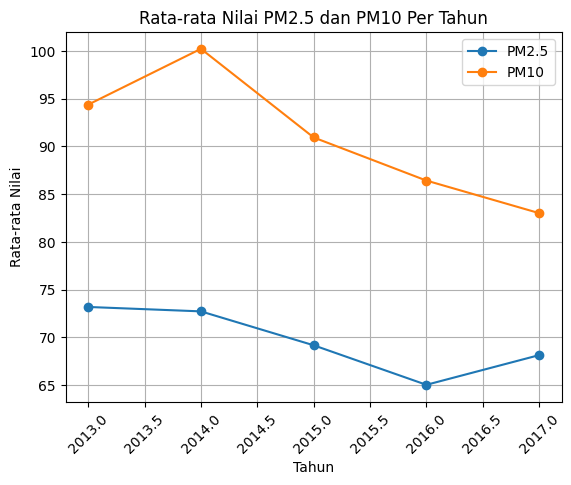

In [22]:
average_pm25_pm10_per_year = combined_data.groupby('year')[['PM2.5', 'PM10']].mean()

plt.figure(figsize=(10, 6))
average_pm25_pm10_per_year.plot(kind='line', marker='o')
plt.title('Rata-rata Nilai PM2.5 dan PM10 Per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Nilai')
plt.xticks(rotation=45)
plt.legend(['PM2.5', 'PM10'])
plt.grid(True)
plt.show()


#### Berdasarkan stasiun

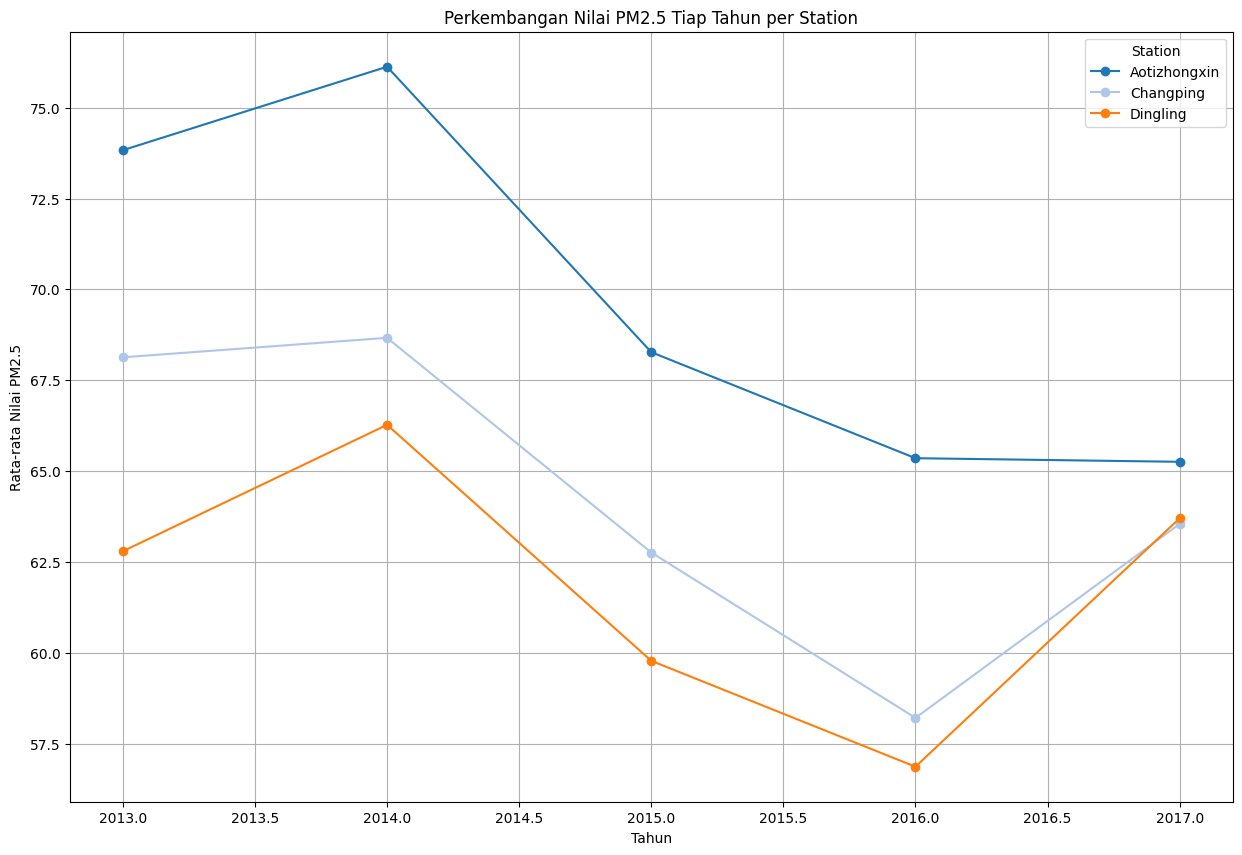

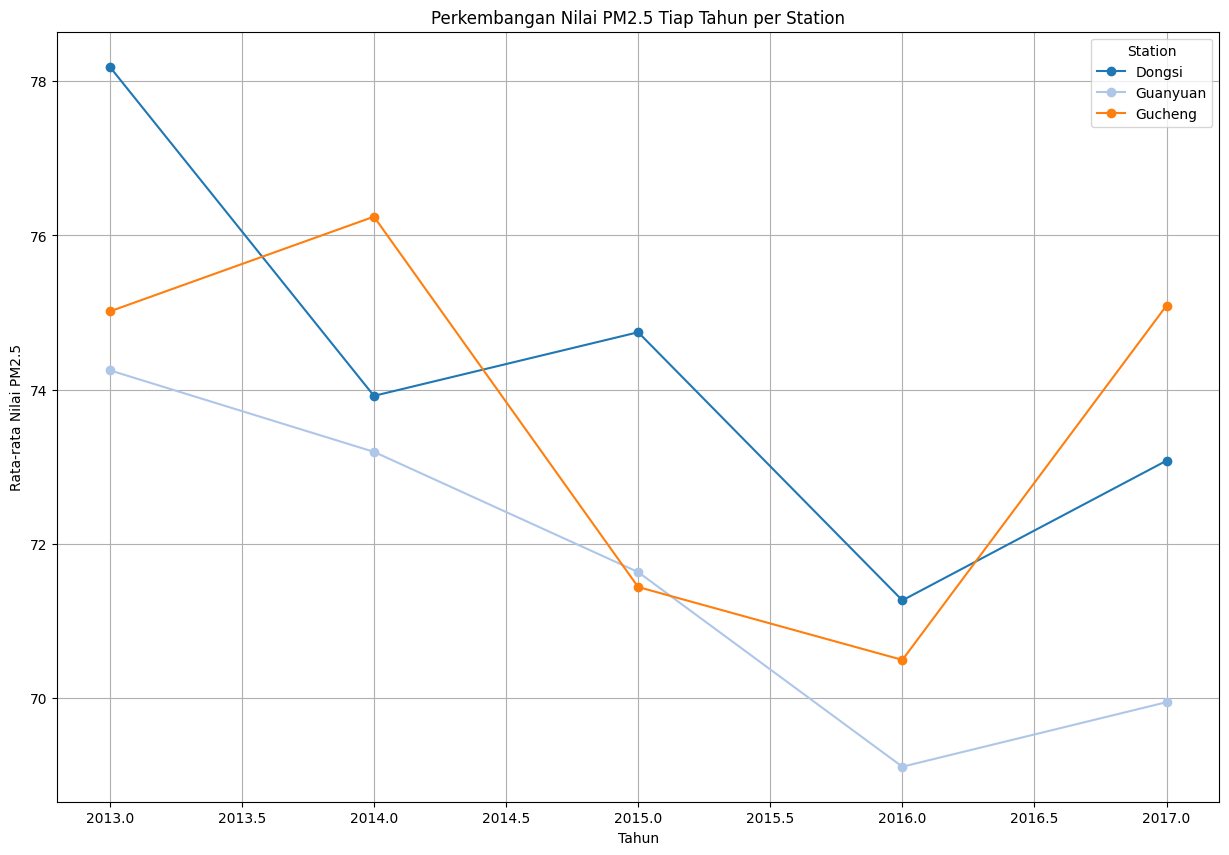

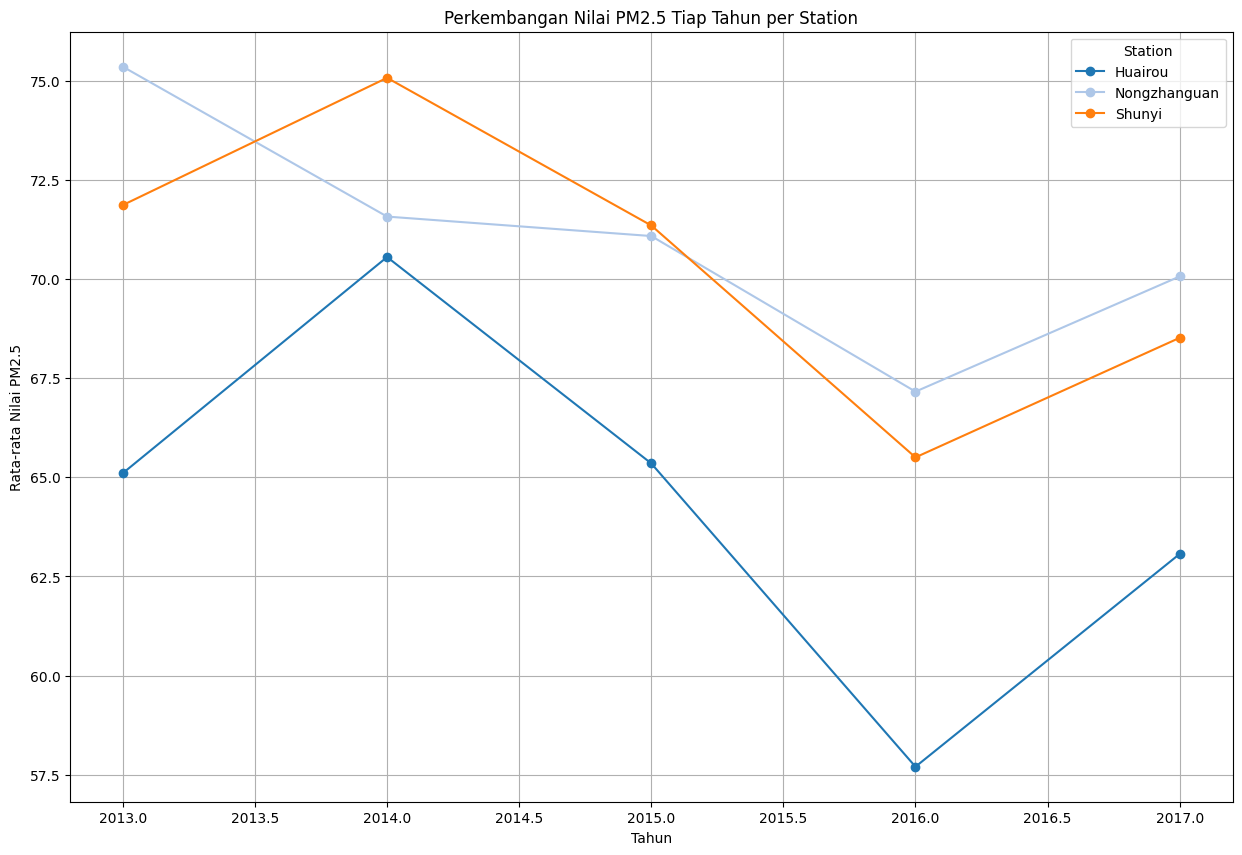

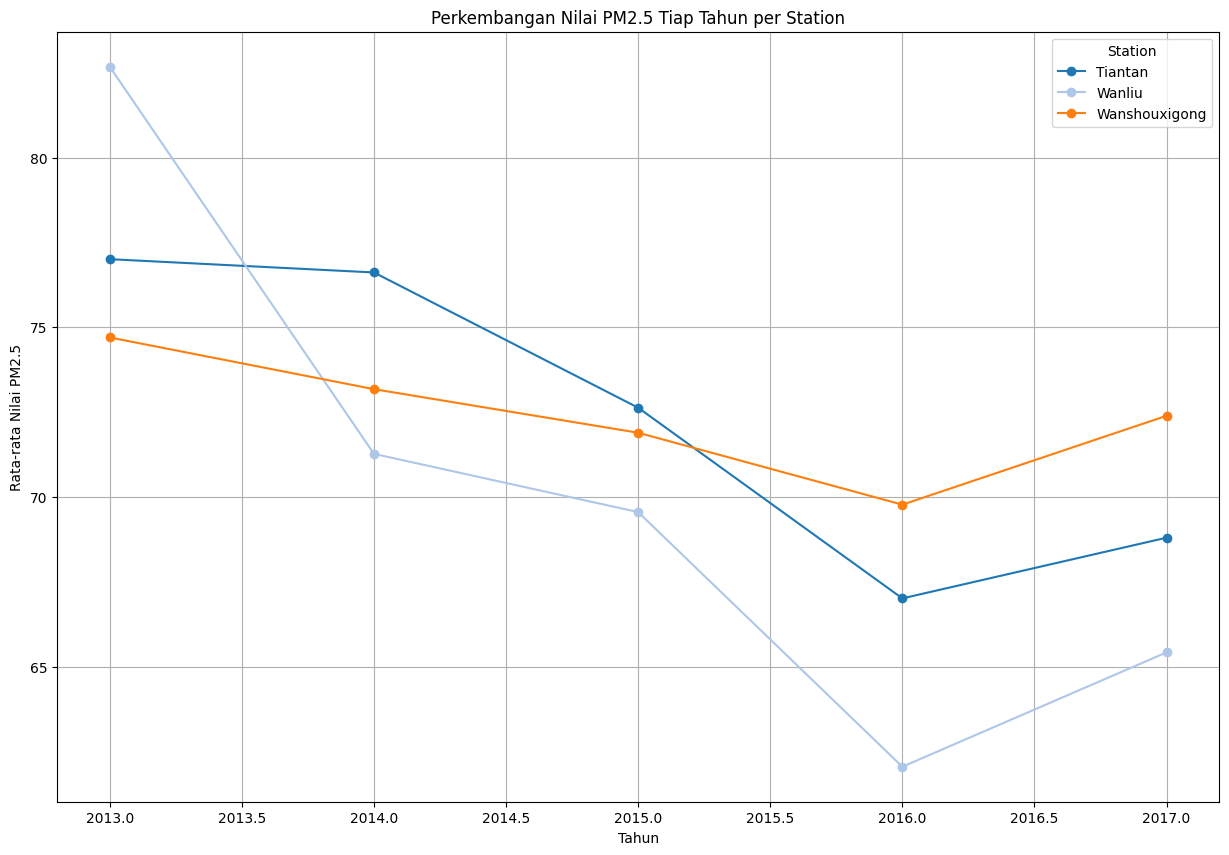

In [23]:
from cycler import cycler

stations = clean_data['station'].unique()
stations_per_figure = 3

for i in range(0, len(stations), stations_per_figure):
    subset_stations = stations[i:i + stations_per_figure]
    
    plt.figure(figsize=(15, 10))
    plt.gca().set_prop_cycle(cycler('color', plt.cm.tab20.colors))
    
    for station in subset_stations:
        station_data = clean_data[clean_data['station'] == station]
        yearly_avg_pm25 = station_data.groupby('year')['PM2.5'].mean()
        plt.plot(yearly_avg_pm25.index, yearly_avg_pm25.values, marker='o', label=station)
    
    plt.title('Perkembangan Nilai PM2.5 Tiap Tahun per Station')
    plt.xlabel('Tahun')
    plt.ylabel('Rata-rata Nilai PM2.5')
    plt.legend(title='Station')
    plt.grid(True)
    plt.show()

Dari data diatas dapat dilihat bahwa terdapat penurunan konsentrasi PM2.5 dan PM10 yang menandakan tiap tahunnya terdapat kenaikan kualitas udara. Dari data tersebut juga didapat periode 2013 - 2014 memiliki kualitas udara yang buruk bila dibandingkan dengan perode tahun 2016 - 2017 yang jauh lebih baik soal kualitas udara. 

### Faktor-faktor apa saja yang memengaruhi perkembangan kualitas udara? 

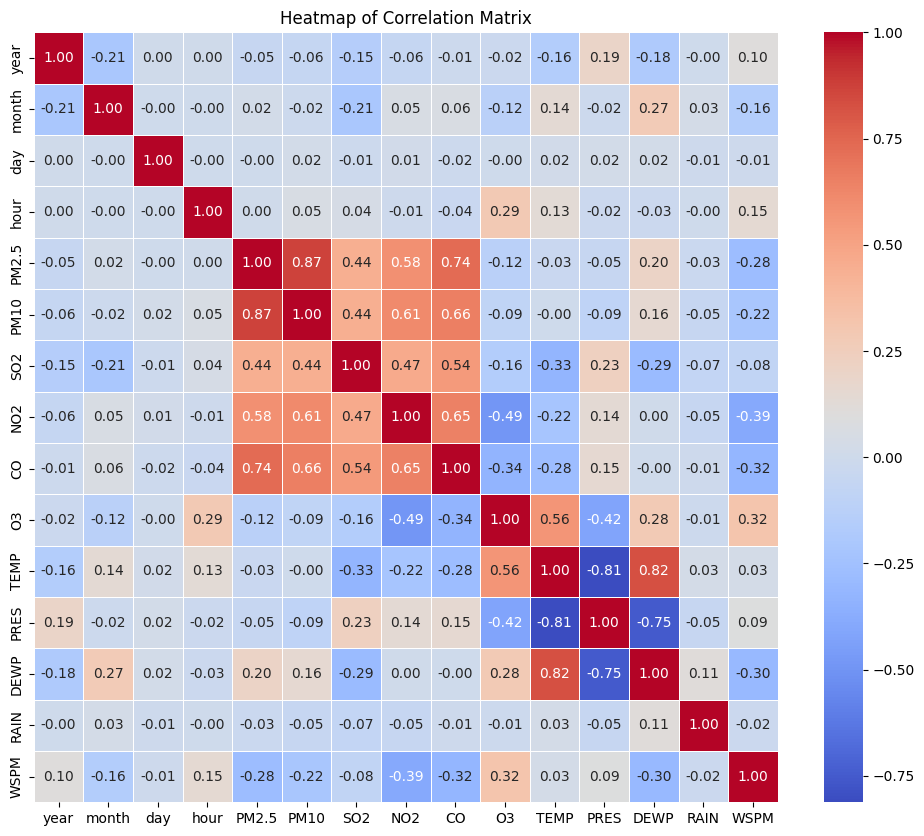

In [26]:
import seaborn as sns

corr_matrix = clean_data[clean_data._get_numeric_data().columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Heatmap of Correlation Matrix')
plt.show()

Variabel PM2.5 sebagai penentu baik buruknya kualitas udara, dapat dilihat CO, NO2, SO2 dan PM10 berkorelasi dengan baik secara linear dan bisa menjadi salah satu faktor yang mempengaruhi kualitas udara. Sementara itu TEMP memiliki memiliki korelasi tidak linear dengan PRESS dan korelasi linear dengan DEWP dan O3.

### Bagaimana persebaran data station pada dataran china?

In [27]:
map_center = [35.8617, 104.1954]
m = folium.Map(location=map_center, zoom_start=5)
station_coords = {
    'Aotizhongxin': [41.749431, 123.534706],
    'Changping': [23.169276, 113.472297],
    'Dingling': [40.28901087962015, 116.22820454435723],
    'Dongsi': [39.919777385684995, 116.4175980582735],
    'Guanyuan': [39.93566504856561, 116.36091220694566],
    'Gucheng': [39.90750287654859, 116.20523143821556],
    'Huairou': [40.28010674366511, 116.70020509174464],
    'Nongzhanguan': [39.93366451803525, 116.46750481009873],
    'Shunyi': [40.13038897356548, 116.65058656480477],
    'Tiantan': [39.11564446598443, 117.15803926397433],
    'Wanliu': [39.99762499454515, 116.25763437810566],
    'Wanshouxigong': [39.90605105134053, 116.26267364841948]
}
for station, coords in station_coords.items():
    folium.Marker(
        location=coords,
        popup=station,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

m

Melihat pada data diatas kebanyakan lokasi yang digunakan berada pada beijing, china sedangkan station lainnya berada pada lokasi di luar beijing. 

### Bagaimana kualitas udara daerah pusat kota dan diluar pusat kota?

/tmp/ipykernel_912/2594092738.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Location', y='Average PM2.5', data=comparison_df, palette='viridis')


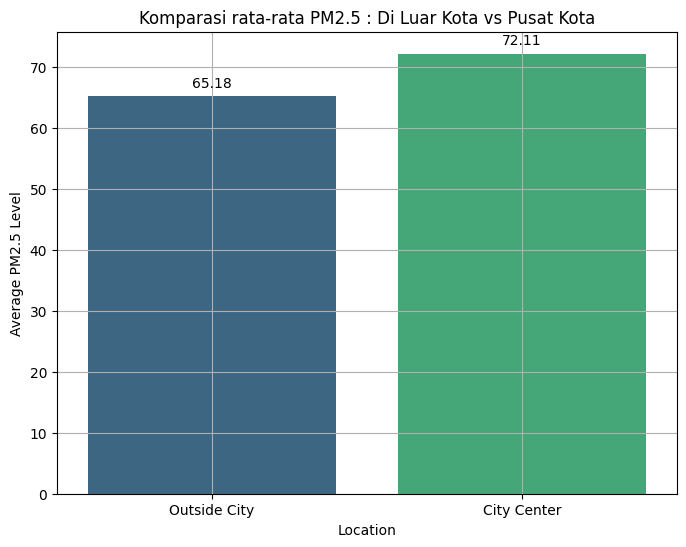

In [28]:
out = ['Aotizhongxin', 'Dingling', 'Huairou', 'Changping']
ins = ['Dongsi', 'Guanyuan', 'Gucheng', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu']
station_pm25_means = clean_data.groupby('station')['PM2.5'].mean()
out_pm25_mean = station_pm25_means[out].mean()
ins_pm25_mean = station_pm25_means[ins].mean()
comparison_df = pd.DataFrame({
    'Location': ['Outside City', 'City Center'],
    'Average PM2.5': [out_pm25_mean, ins_pm25_mean]
})
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Location', y='Average PM2.5', data=comparison_df, palette='viridis')
for i, (value, name) in enumerate(zip(comparison_df['Average PM2.5'], comparison_df['Location'])):
    ax.text(i, value + 1, f'{value:.2f}', ha='center', va='bottom')

plt.title('Komparasi rata-rata PM2.5 : Di Luar Kota vs Pusat Kota')
plt.xlabel('Location')
plt.ylabel('Average PM2.5 Level')
plt.grid(True)
plt.show()


Penentuan apakah stasiun berada di pusat kota atau di luar kota dapat dilihat berdasarkan persebaran data sebelumnya. Apabila stasiun tidak berada didekat gedung-gedung atau berada dipinggiran kota maka stasiun tersebut tidak berada didalam kota begitu pula sebaliknya. Didapat bahwa stasiun yang berada di luar kota jauh lebih sedikit konsentrasi PM2.5 bila dibandingkan di pusat kota.

### Station mana yang memiliki kualitas udara terburuk dan terbaik

/tmp/ipykernel_912/2932372581.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=station_pm25_means, y=station_pm25_means.index, palette='viridis')


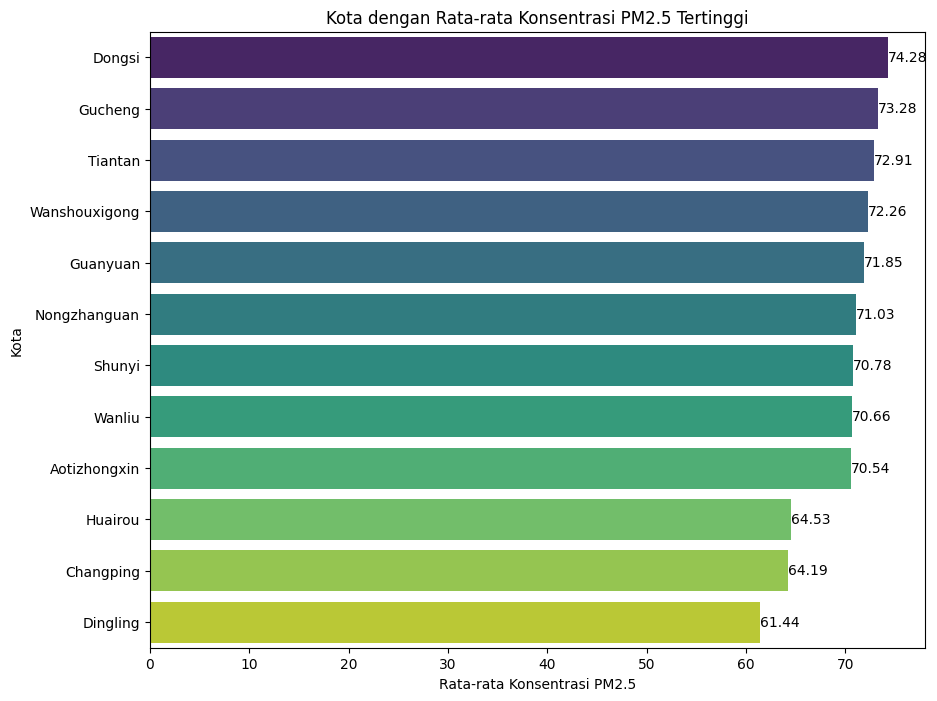

In [29]:
import seaborn as sns

station_pm25_means = clean_data.groupby('station')['PM2.5'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=station_pm25_means, y=station_pm25_means.index, palette='viridis')
for i, (value, name) in enumerate(zip(station_pm25_means, station_pm25_means.index)):
    ax.text(value, i, f'{value:.2f}', ha='left', va='center')

plt.title('Kota dengan Rata-rata Konsentrasi PM2.5 Tertinggi')
plt.xlabel('Rata-rata Konsentrasi PM2.5')
plt.ylabel('Kota')
plt.show()

/tmp/ipykernel_912/2119426059.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  station_pm25_category_counts = clean_data.groupby(['station', 'PM2.5_Category']).size().unstack()


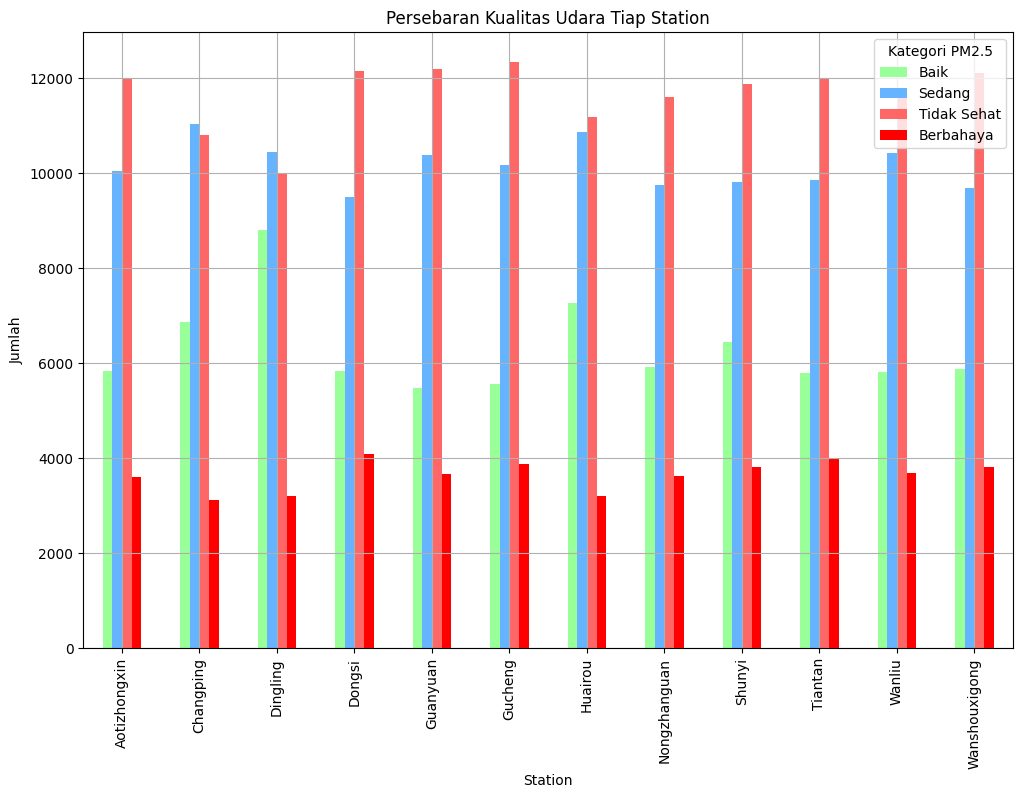

In [30]:
# Menghitung jumlah kategori PM2.5 per station
station_pm25_category_counts = clean_data.groupby(['station', 'PM2.5_Category']).size().unstack()

# Plotting bar plot
station_pm25_category_counts.plot(kind='bar', figsize=(12, 8), color=['#99ff99','#66b3ff','#ff6666' ,'#ff0000'])

plt.title('Persebaran Kualitas Udara Tiap Station')
plt.xlabel('Station')
plt.ylabel('Jumlah')
plt.legend(title='Kategori PM2.5')
plt.grid(True)
plt.show()


Stasiun yang memiliki kualitas udara terburuk dipegang oleh dongsi, dan kualitas terbaik dipegang oleh dingling. 

In [31]:
clean_data.to_csv('./dashboard/main_data.csv', index=False)